<b>Created by:</b> Matilda Eriksson
<br>
<b>Created at:</b> 2021-08-27
<br>
<b>Last updated:</b> 2021-09-16</b><br>
<b>Data Source:</b> https://www.kaggle.com/blastchar/telco-customer-churn

This is a dataset from a fictional Telecommunications company. 

My intention is to identify customers that are likely to churn and features correlated to this. I have summarized the problem statement as following:

<i>Can we determine what causes customer to cancel their accounts so that we can devise strategies to make improvements to our customer retention program and reduce churn?</i>

In [1]:
# Importing libraries 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('dark')
sns.set_palette('husl')

In [2]:
# Loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Looking at the first 5 rows
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# Number of rows and columns
df.shape

(7043, 21)

In [5]:
# Looking for duplicates
df.duplicated().any()

False

In [6]:
# Looking at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<i>"TotalCharges" is currently an object-type. I will change it to numeric since it has a continious value. I will also remove the customerID column since I will not use it in the analysis.</i>

In [7]:
# Changing 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Dropping column 'customerID'
df.drop(columns='customerID', inplace=True)

<i>"TotalCharges" has some missing values. These are from customers who have not yet received their first invoice. I will set their value to 0</i>

In [8]:
# Recplacing null values with 0
df['TotalCharges'].fillna(0, inplace=True)

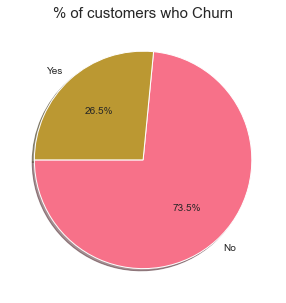

In [9]:
# Looking at the over-all churn rate

plt.figure(figsize=(5,5))
plt.pie(df['Churn'].value_counts(sort=True), autopct='%1.1f%%', shadow=True, startangle=180,
        labels=['No', 'Yes'])
plt.title('% of customers who Churn', size=15);


<b> The over all churn rate is 27%</b>

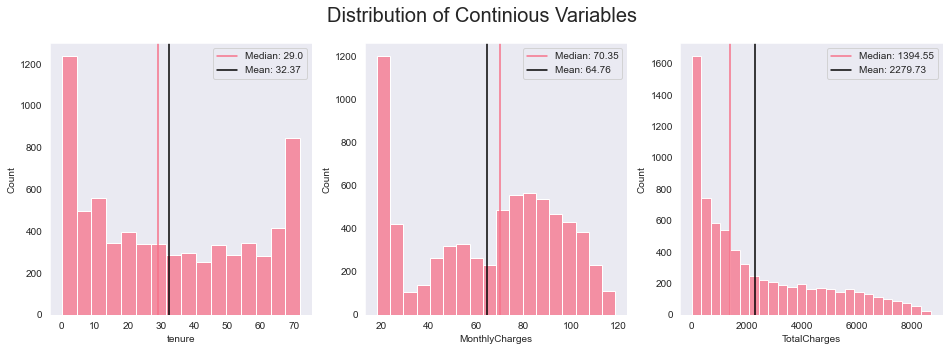

In [10]:
# Distribution of continious variables
sns.set_style('dark')
sns.set_palette('husl')
fig, axes = plt.subplots(1, 3, figsize=(16,5))
sns.histplot(ax=axes[0], x=df.tenure)
fig.suptitle('Distribution of Continious Variables', size=20)
axes[0].axvline(np.median(df['tenure']), label='Median: ' + str(np.median(df['tenure'])))
axes[0].axvline(np.mean(df['tenure']), color='black', label='Mean: ' + str(np.round(np.mean(df['tenure']),2)))
axes[0].legend()
sns.histplot(ax=axes[1], x='MonthlyCharges', data=df)
axes[1].axvline(np.median(df['MonthlyCharges']), label= 'Median: ' + str(np.median(df['MonthlyCharges'])))
axes[1].axvline(np.mean(df['MonthlyCharges']), color='black', label='Mean: ' + str(np.round(np.mean(df['MonthlyCharges']),2)))
axes[1].legend()
sns.histplot(ax=axes[2], x='TotalCharges', data=df)
axes[2].axvline(np.nanmedian(df['TotalCharges']), label='Median: ' + str(np.round(np.median(df['TotalCharges']),2)))
axes[2].axvline(np.nanmean(df['TotalCharges']), color='black', label='Mean: ' + str(np.round(np.mean(df['TotalCharges']),2)))
axes[2].legend()
plt.rcParams["patch.force_edgecolor"] = True;


- Tenure distribution is bimodal, with one mode of low tenure and one with high.
- In Monthly Charges there's one big group of customers with low charges and another large group of customers with charges above average.
- TotalCharges is right skewed.


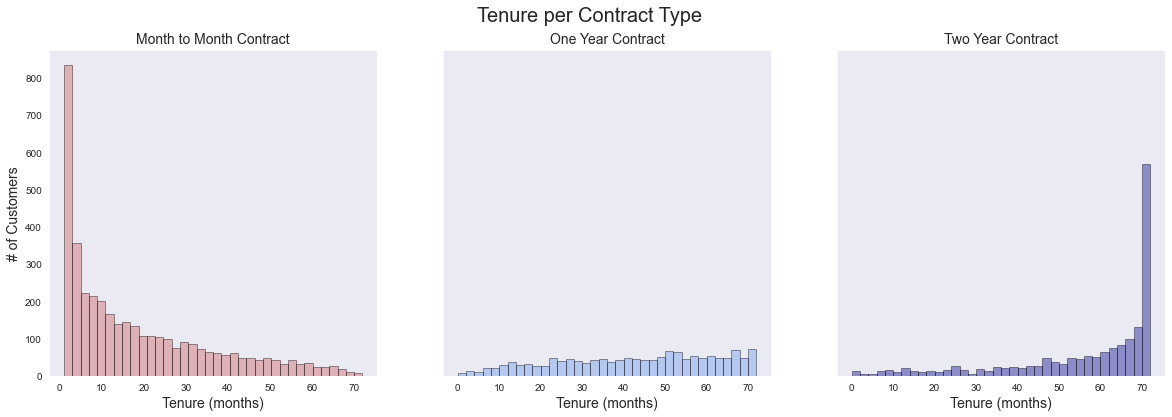

In [11]:
# Distribution of tenure per contact type
fig, axes = plt.subplots(1, 3, sharey = True, figsize = (20,6))
fig.suptitle('Tenure per Contract Type', size=20)

sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'indianred',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[0])
axes[0].set_ylabel('# of Customers', size=14)
axes[0].set_xlabel('Tenure (months)', size=14)
axes[0].set_title('Month to Month Contract', size=14)

sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'cornflowerblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[1])
axes[1].set_xlabel('Tenure (months)',size = 14)
axes[1].set_title('One Year Contract',size = 14)

sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[2])
axes[2].set_xlabel('Tenure (months)', size=14)
axes[2].set_title('Two Year Contract', size=14);

<i>If we look at tenure per contract type, we can see that the mode of low tenure is represented by customers with a Month-to-Month contract, while the high tenure mode is respresentet by customers from both Month-to-Month and Two-Year Contracts.</i>

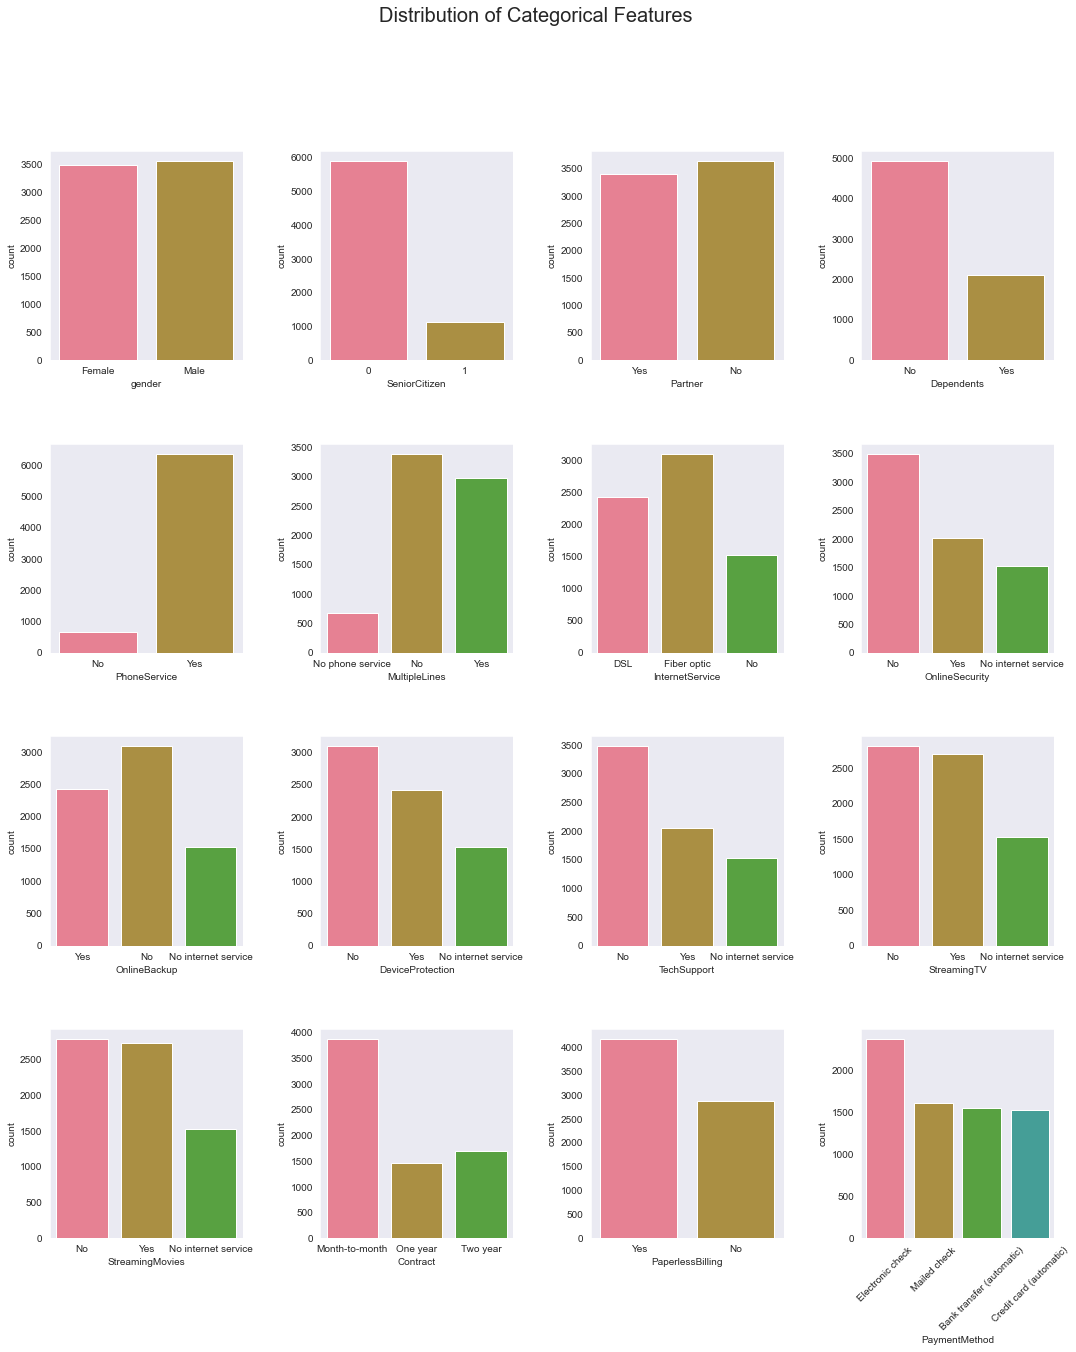

In [12]:
# Categorical distributions
fig, axes = plt.subplots(4, 4, figsize=(18,20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.set_palette('husl')
fig.suptitle('Distribution of Categorical Features', size=20)
sns.countplot(ax=axes[0,0],x='gender',data=df)
sns.countplot(ax=axes[0,1],x='SeniorCitizen',data=df)
sns.countplot(ax=axes[0,2],x='Partner',data=df)
sns.countplot(ax=axes[0,3],x='Dependents',data=df)
sns.countplot(ax=axes[1,0],x='PhoneService',data=df)
sns.countplot(ax=axes[1,1],x='MultipleLines',data=df)
sns.countplot(ax=axes[1,2],x='InternetService',data=df)
sns.countplot(ax=axes[1,3],x='OnlineSecurity',data=df)
sns.countplot(ax=axes[2,0],x='OnlineBackup',data=df)
sns.countplot(ax=axes[2,1],x='DeviceProtection',data=df)
sns.countplot(ax=axes[2,2],x='TechSupport',data=df)
sns.countplot(ax=axes[2,3],x='StreamingTV',data=df)
sns.countplot(ax=axes[3,0],x='StreamingMovies',data=df)
sns.countplot(ax=axes[3,1],x='Contract',data=df)
sns.countplot(ax=axes[3,2],x='PaperlessBilling',data=df)
sns.countplot(ax=axes[3,3],x='PaymentMethod',data=df)
plt.xticks(rotation=45);

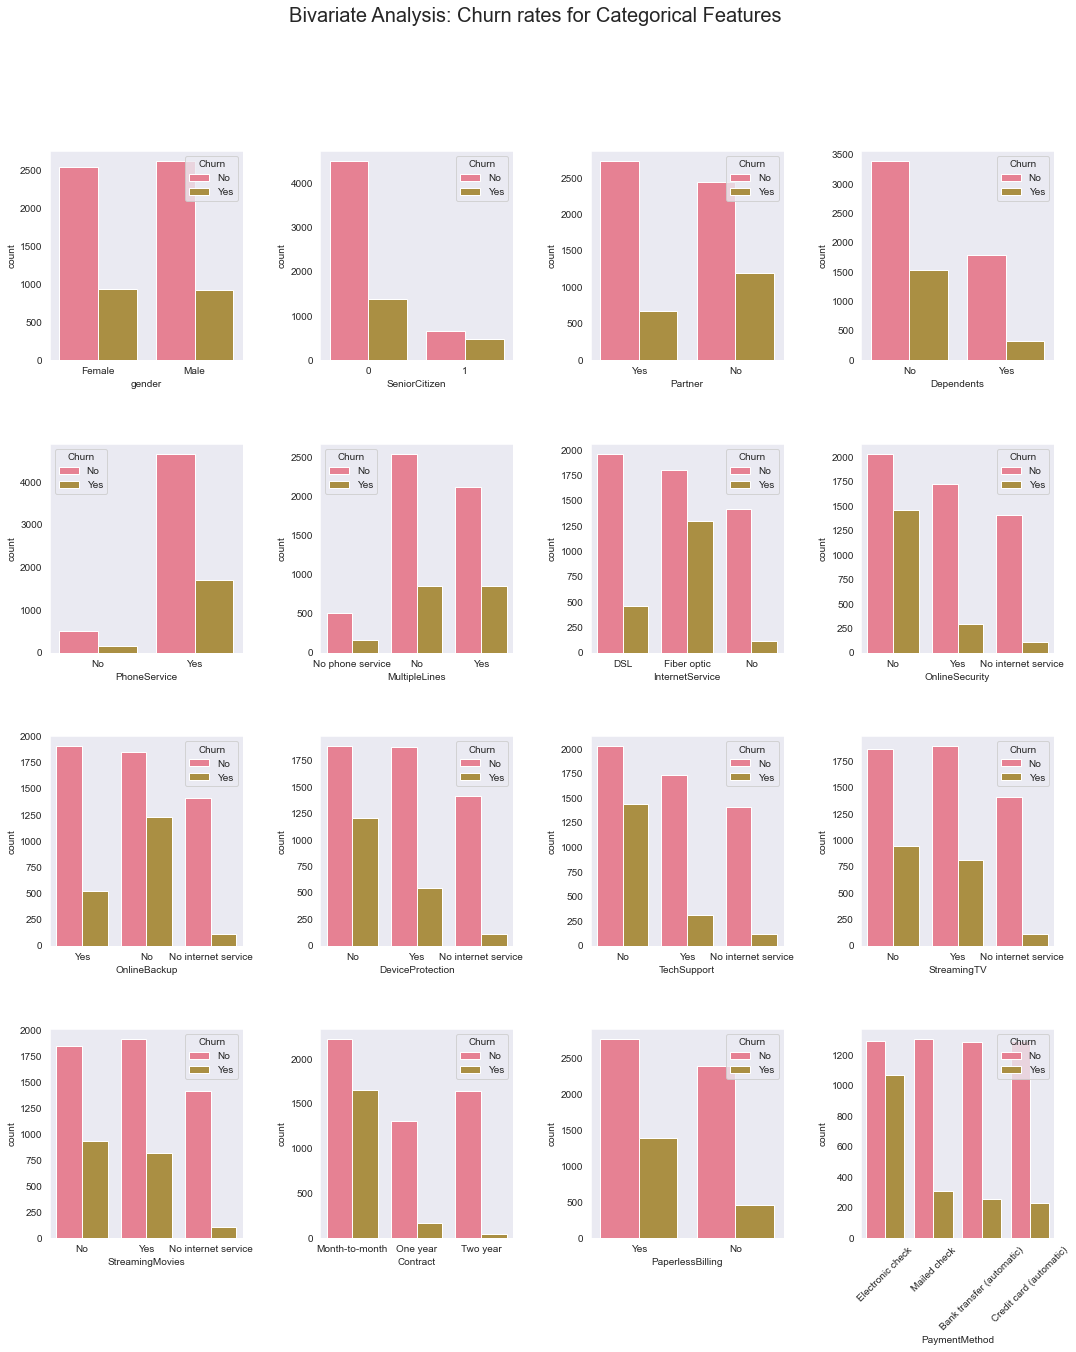

In [13]:
# Visualizing churn rate for all categorical features

fig, axes = plt.subplots(4, 4, figsize=(18,20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('Bivariate Analysis: Churn rates for Categorical Features', size=20)
sns.countplot(ax=axes[0,0],x='gender',hue='Churn',data=df)
sns.countplot(ax=axes[0,1],x='SeniorCitizen',hue='Churn',data=df)
sns.countplot(ax=axes[0,2],x='Partner',hue='Churn',data=df)
sns.countplot(ax=axes[0,3],x='Dependents',hue='Churn',data=df)
sns.countplot(ax=axes[1,0],x='PhoneService',hue='Churn',data=df)
sns.countplot(ax=axes[1,1],x='MultipleLines',hue='Churn',data=df)
sns.countplot(ax=axes[1,2],x='InternetService',hue='Churn',data=df)
sns.countplot(ax=axes[1,3],x='OnlineSecurity',hue='Churn',data=df)
sns.countplot(ax=axes[2,0],x='OnlineBackup',hue='Churn',data=df)
sns.countplot(ax=axes[2,1],x='DeviceProtection',hue='Churn',data=df)
sns.countplot(ax=axes[2,2],x='TechSupport',hue='Churn',data=df)
sns.countplot(ax=axes[2,3],x='StreamingTV',hue='Churn',data=df)
sns.countplot(ax=axes[3,0],x='StreamingMovies',hue='Churn',data=df)
sns.countplot(ax=axes[3,1],x='Contract',hue='Churn',data=df)
sns.countplot(ax=axes[3,2],x='PaperlessBilling',hue='Churn',data=df)
sns.countplot(ax=axes[3,3],x='PaymentMethod',hue='Churn',data=df)
plt.xticks(rotation=45);

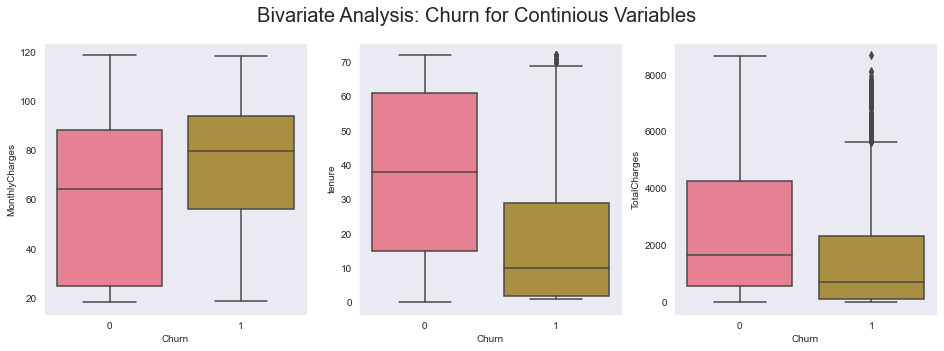

In [14]:
# Visulizing Churn rate for continious features
fig, axes = plt.subplots(1, 3, figsize=(16,5))
df.replace({'Yes':1, 'No':0}, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['Churn'] = pd.to_numeric(df['Churn'])
fig.suptitle('Bivariate Analysis: Churn for Continious Variables', size=20)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[1])
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2]);

<b>We can identify some customers that have higher churn rates:</b>
<br>
- Senior Citizens
- Customers with shorter contracts
- Customers with "Electronic Checks" as Payment Method (also paperless billing)
- Customers without partners
- Customers with FiberOptic as Internet Service
- Customers with some kind of Internet Service but without extra services such as "OnlineSecurity", "OnlineBackup", "DeviceProtection" and "TechSupport"
- Newly signed customers (customers with low tenures)
- Customers with higher than average Monthly Costs
<br>
<br>
<b>We can also identify those who are less likely to churn:</b>
- Customers with depedents 
- Customers with automatic payments

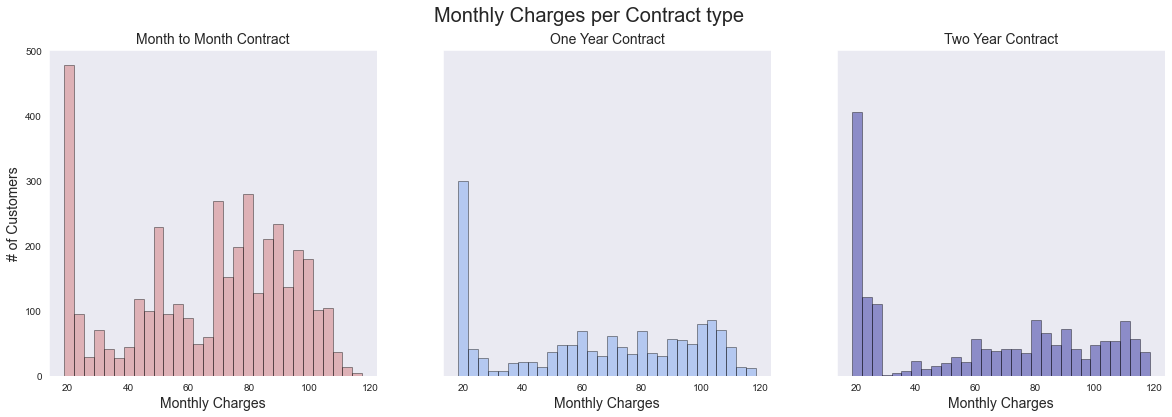

In [15]:
# Monthly Charges per Contract type
fig, axes = plt.subplots(1, 3, sharey = True, figsize = (20,6))
fig.suptitle('Monthly Charges per Contract type', size=20)

sns.distplot(df[df['Contract']=='Month-to-month']['MonthlyCharges'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'indianred',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[0])
axes[0].set_ylabel('# of Customers', size=14)
axes[0].set_xlabel('Monthly Charges', size=14)
axes[0].set_title('Month to Month Contract', size=14)

sns.distplot(df[df['Contract']=='One year']['MonthlyCharges'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'cornflowerblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[1])
axes[1].set_xlabel('Monthly Charges',size = 14)
axes[1].set_title('One Year Contract',size = 14)

sns.distplot(df[df['Contract']=='Two year']['MonthlyCharges'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=axes[2])
axes[2].set_xlabel('Monthly Charges', size=14)
axes[2].set_title('Two Year Contract', size=14);

<i>The distribution of Monthly Charges is more spread out and somewhat higher for shorter contracts. We know that both higher Monthly Costs and shorter Contract Types are correlated to higher churn rates.</i>

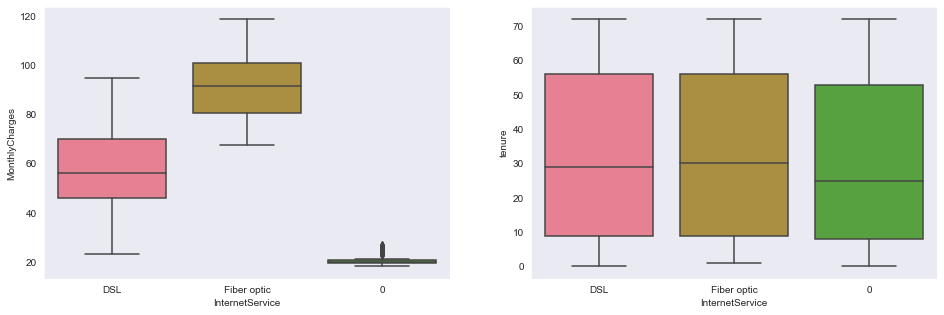

In [16]:
# Comparing charges and tenure per internet service
fig, axes = plt.subplots(1, 2, figsize=(16,5))
sns.boxplot(x='InternetService', y='MonthlyCharges', data=df, ax=axes[0])
sns.boxplot(x='InternetService', y='tenure', data=df, ax=axes[1]);

<i>Customers with Internet Services have higher monthly charges, which make sense. Their tenure is very similar to those who don't have Internet Service</i>

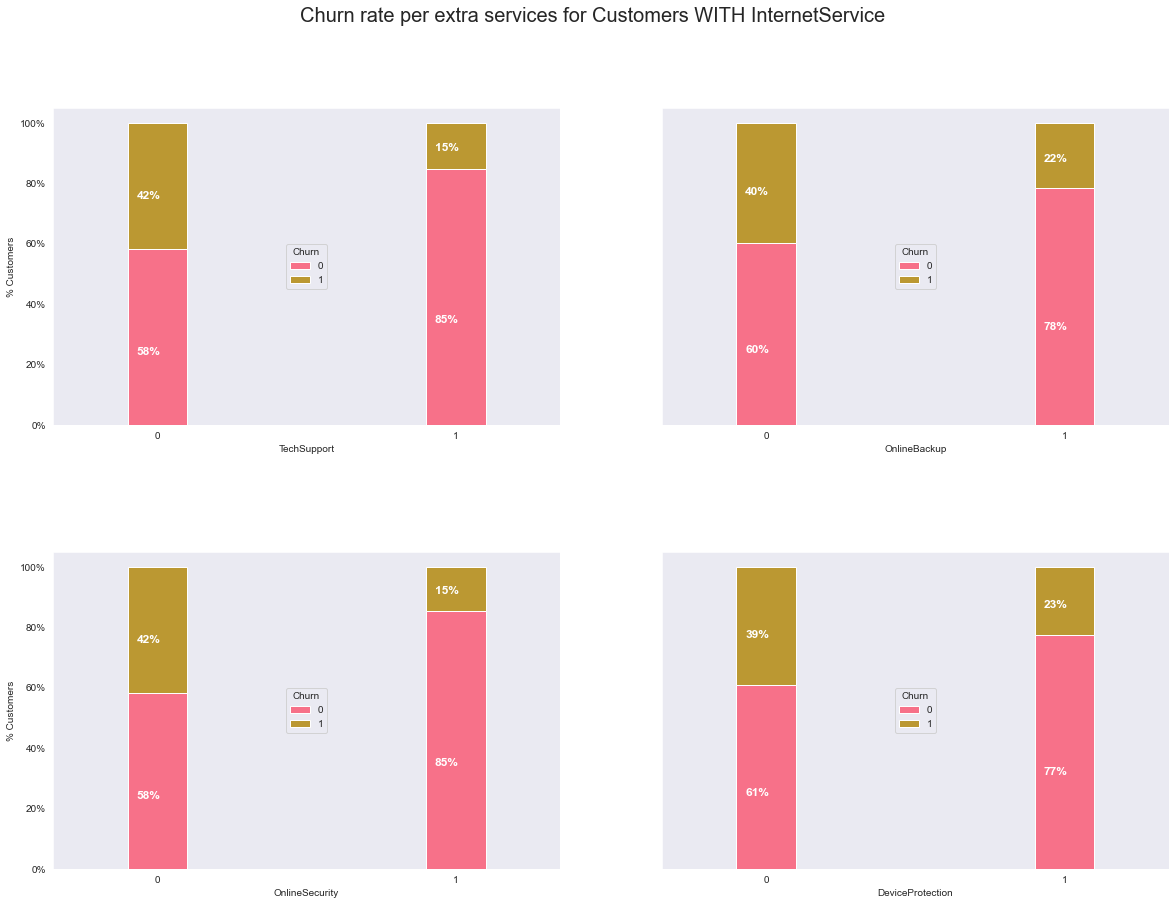

In [17]:
# Comparing churn rates for customers that HAS internet services depending on their extra services.

with_internet = df[df['InternetService'] != 0]
import matplotlib.ticker as mtick
##
fig, axes = plt.subplots(2, 2, figsize=(20,14), sharey=True)
plt.subplots_adjust(hspace=0.4)
fig.suptitle('Churn rate per extra services for Customers WITH InternetService', size=20)
##
tech_c = with_internet.groupby(['TechSupport','Churn']).size().unstack()
ax = (tech_c.T*100.0 / tech_c.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0, ax=axes[0,0])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)
##
online_c = with_internet.groupby(['OnlineBackup','Churn']).size().unstack()
ax = (online_c.T*100.0 / online_c.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0, ax=axes[0,1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)
##
onlines_c = with_internet.groupby(['OnlineSecurity','Churn']).size().unstack()
ax = (onlines_c.T*100.0 / onlines_c.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0, ax=axes[1,0])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)
##
device_c = with_internet.groupby(['DeviceProtection','Churn']).size().unstack()
ax = (device_c.T*100.0 / device_c.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True, rot = 0, ax=axes[1,1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =12)

<i>As indicated earlier, we can see in the stacked bar charts above that the churn rates for customer who has Internet Service, but no extra services, are higher.</i>
<br>
<br>
<b> We can also look at the correlations in a corr plot:</b>

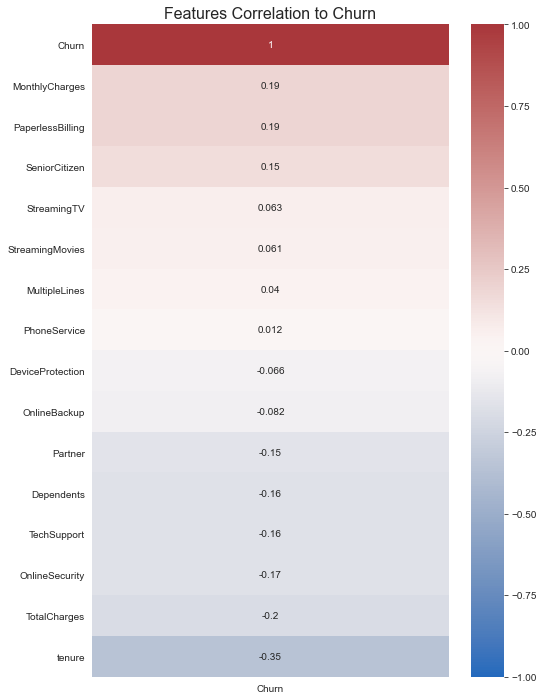

In [18]:
# Features correlated to Churn
df.replace({'Yes':1, 'No':0, 'No internet service':0, 'No phone service': 0}, inplace=True)
plt.figure(figsize=(8, 12))
corr = sns.heatmap(df.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
corr.set_title('Features Correlation to Churn', fontdict={'fontsize':16});

In [19]:
# Correlation between different features
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.062078,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,0.011942
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468504,0.040102
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.411651,-0.171226
OnlineBackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509226,-0.082255
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.521983,-0.066160
TechSupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,0.431883,-0.164674


<i>Monthly Charges & Total Charges are highly correlated, which makes sense. Same for Total Charges & Tenure.</i>

# Summary
- The biggest correlation to churn <i>(except from tenure)</i> is customers with high Monthly Charges and/or Total Charges, and Paperless Billing. Monthly Charges can be higher due to more services such as Internet or that the customer has a shorter contract, since both correlates to highter monthly costs. 
<br>
<br>
- Most of our customers (78%) have Internet Services. 
<br>
<br>
- Out of those who have Internet Services, we can see a clear difference in churn rate between those who have extra services such as Tech Support or Online Backup. The customers who have these extra services have a churn rate lower than average, while those who haven't, have a churn rate above average.
<br>
<br>
- Customers with automatic payments are less likely to churn. However, 57 percent of our customers don't have automatic payments! 34 percent of our customers pay by electronic check, where the churn rate is 45% (!)

# Suggestions

In [21]:
#The current lost revenue for customers without automatic payment:
df3 = df.loc[(df['PaymentMethod'] == 'Electronic check') | (df['PaymentMethod'] == 'Mailed check')]
sum(df3['MonthlyCharges'][df3['Churn'] == 1])

101092.35000000002

In [23]:
#The current lost revenue for customers without add-ons churning is:
df8 = df[df['InternetService'] != 0]
df8 = df8[(df8['OnlineBackup'] == 0) & (df8['OnlineSecurity'] == 0) & (df8['DeviceProtection'] == 0) & (df8['TechSupport'] == 0) ]
sum(df8['MonthlyCharges'][df8['Churn'] == 1])

50806.05

Firstly, I would suggest increased marketing of add on-services such as Tech Support, Online Backup, Online Security & DeviceProtection towards customers who already have Internet Services. The current lost revenue for customers who does not have any of these add ons is > 50000 per month! What if we could have made them stay by promoting these extra services, which also contributes to more sales for the company?

Secondly, I would suggest that the company promotes automatic payments in a larger scale to both new and current customers. The current lost revenue for customers without paperless billing who churned is > 100 000! If we reached out to these customers, and that made just 10% of them stay, that would mean 10 000 more in sale per month for the company.

I would also suggest that the company takes action on their best customers; those with high monthlty charges. They are valuable for the company but also have a higher risk of churn. What can we do to make these customers stay? Can we offer them something, like a loyalty program, to make them feel that it's worth staying?
